# Plots und einfache Datenvisualisierung in Julia

- Frage "Wie plottet man in Julia?" inzwischen genauso sinnvoll wie "Wie plottet man in C++?";
- es gibt zahlreiche Pakete, die unterschiedlich geeignet sind je nach

  - Ausgabemedium: Grafikkarte, PDF, SVG, PNG, WebApp,....
  - Interaktivität
  - 2D- und 3D-Fähigkeiten
  - Plottypen
  - Umgang mit großen Datenmengen
  ...
 
  

 
## Einbindung anderer Grafikbibliotheken

### JavaScript: Interaktivität im Browser

- [PlotlyJS.jl](http://juliaplots.org/PlotlyJS.jl/stable/examples/3d/) Interface zur PlotlyJS-Grafikbibliothek
- [Bokeh.jl](https://cjdoris.github.io/Bokeh.jl/stable/gallery/) Interface zur Bokeh-Grafikbibliothek
- [VegaLite.jl](https://www.queryverse.org/VegaLite.jl/stable/)  Interface zu VegaLite, vor allem statistische Plots

### Cairo: 2D Vektorgrafik, für Grafikkarte (screen), PDF, PNG, SVG,...

- [Luxor.jl](http://juliagraphics.github.io/Luxor.jl/stable/) für Vektorgrafik
- [Javis.jl](https://juliaanimators.github.io/Javis.jl/stable/) für animierte Vektorgrafik

### Matplotlib (Python)

- [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl) 
   
   - weitgehende 1:1-Übertragung der Python-API, deswegen wird auch auf die Matplotlib-Dokumentation verwiesen
   - Beispiele mit Gegenüberstellung Python/Julia: [https://gist.github.com/gizmaa/7214002](https://gist.github.com/gizmaa/7214002)

## Pure Julia: Makie.jl

`Makie` bezeichnet sich selbst als _"data visualization ecosystem for Julia"_

Es ist vollständig in Julia geschrieben und bietet als _backends_ `Cairo` (Vektorgrafik), `OpenGL` und `WebGL` an.


- [Makie.jl](https://makie.juliaplots.org/stable/)
- [Beautiful Makie](https://lazarusa.github.io/BeautifulMakie/) eine Seite mit vielen Beispielen


# Plots.jl

- [Plots.jl](https://docs.juliaplots.org/latest/) ist konzipiert als ein einheitliches Interface zu verschiedenen _backends_ (Grafikbibliotheken).
   > Man kann zu einem anderen _backend_ wechseln und dieselben Plot-Kommandos und -Attribute verwenden.
   
- Einige _backends_:
  
   - [GR](https://gr-framework.org/)
   - PyPlot (d.h., Matplotlib)
   - Plotly(JS)
   

Plots.jl schien mir am besten geeignet für den Workflow 

`Jupyter notebooks => Konvertierung nach HTML/LaTeX/PDF`


[//]: # (https://www.math.purdue.edu/~allen450/Plotting-Tutorial.html)


[//]: # (https://www.geeksforgeeks.org/visualisation-in-julia/)


__Im Rest dieses Notebooks wird Plots.jl vorgestellt.__


## einige _backends_

In [1]:
using Plots
backend()      # Anzeige des gewählten backends, GR ist der default

Plots.GRBackend()

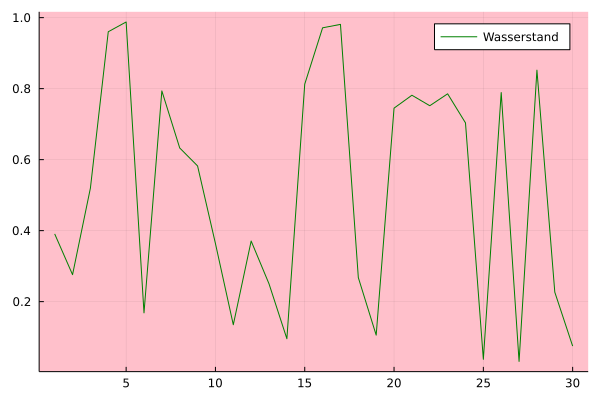

In [2]:
x = 1:30
y = rand(30)
 
plot(x, y, linecolor =:green, bg_inside =:pink, line =:solid, label = "Wasserstand")

In [3]:
# wir wechseln das backend zu 
# plotly/js


plotly() 

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/hellmund/.julia/packages/Plots/MzlNY/src/backends.jl:318


Plots.PlotlyBackend()

In [4]:
# dasselbe Plot-Kommando

# das ist interaktiv (zoom in/out, pan), 
# 'überlebt' aber leider die PDF-Konvertierung des notebooks nicht

plot(x, y, linecolor =:green, bg_inside =:pink, line =:solid, label = "Wasserstand")

In [5]:
# und noch ein backend

pyplot()

Plots.PyPlotBackend()

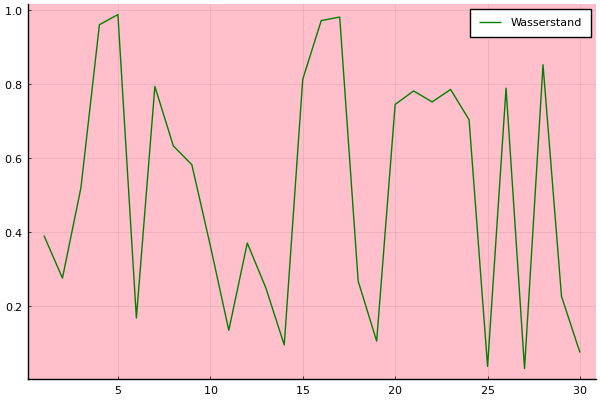

In [6]:
plot(x, y, linecolor =:green, bg_inside =:pink, line =:solid, label = "Wasserstand")

In [7]:
# zurück zu GR als backend

gr()

Plots.GRBackend()

## Plots.jl und recipes

Andere Pakete können die Möglichkeiten von `Plots.jl` erweitern, indem sie  _recipes_ für spezielle Plots und Datenstrukturen definieren, siehe [https://docs.juliaplots.org/latest/ecosystem/](https://docs.juliaplots.org/latest/ecosystem/), z.B.:

- `StatsPlots.jl` direktes Plotten von Dataframes, spezielle statistische Plots,...
- `GraphRecipes.jl`  [Plotten von Graphstrukturen](https://docs.juliaplots.org/stable/graphrecipes/examples/)
- ...




## Einige Verschönerungen

In [8]:
using Plots.PlotMeasures   # für Angaben in mm, cm,...
using LaTeXStrings         # für LaTeX-Konstrukte in Plot-Beschriftungen
using PlotThemes           # vorgefertigte Themen

In [9]:
# Liste der Themen
keys(PlotThemes._themes)

KeySet for a Dict{Symbol, PlotThemes.PlotTheme} with 18 entries. Keys:
  :juno
  :default
  :dao
  :ggplot2
  :gruvbox_dark
  :dark
  :gruvbox_light
  :solarized
  :wong
  :dracula
  :solarized_light
  :mute
  :wong2
  :sand
  :lime
  :bright
  :vibrant
  :orange

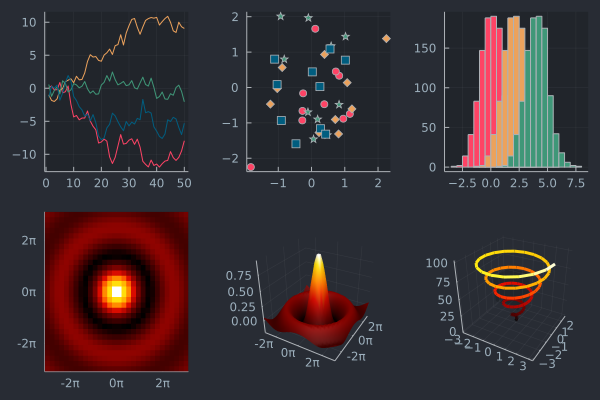

In [10]:
Plots.showtheme(:juno)

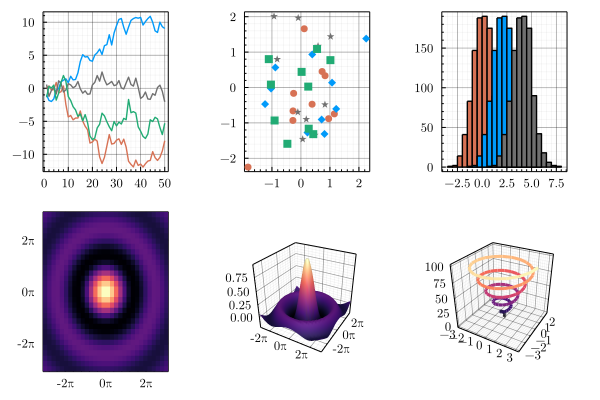

In [11]:
Plots.showtheme(:dao)

In [12]:
# so legt man ein Thema für die folgenden Plots fest:

theme(:dao)

# Wir wollen es wieder langweilig haben...

theme(:default) 

## Funktionen in Plots.jl

```
plot()
scatter()
contour()
heatmap()
histogram()
bar()
plot3d()
... und weitere
```
Diese Funktionen erzeugen ein neues `Plot`-Objekt. 

Die Varianten mit Ausrufezeichen `plot!(), scatter!(),...` modifizieren das letzte `Plot`-Objekt oder das `Plot`-Objekt, das ihnen als 1. Argument übergeben wird:   

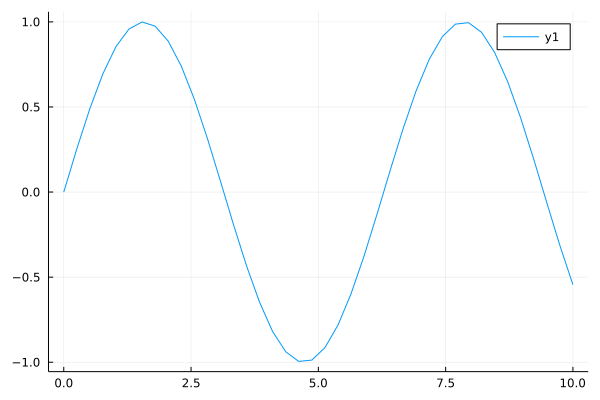

In [13]:
x = range(0,10, length=40)   # 40 x-Werte von 0 bis 10

pl1 = plot(x, sin.(x))

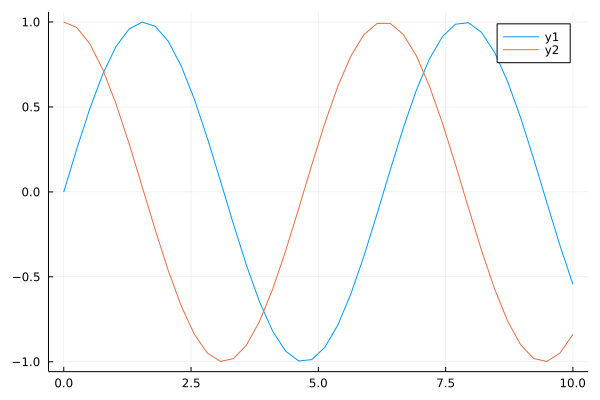

In [14]:
pl1a = deepcopy(pl1)  # unmodifizierte copy aufheben

pl2 = plot!(x, cos.(x))    # modifiziert pl1

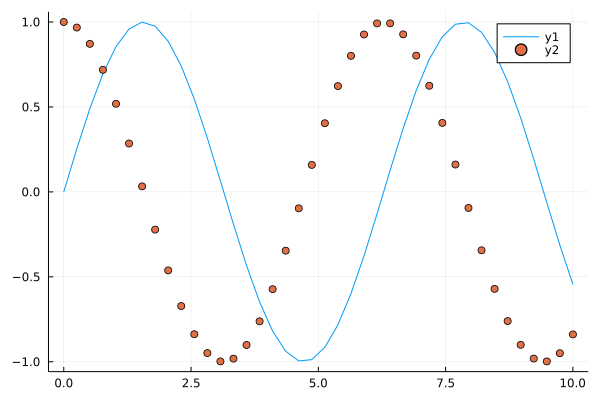

In [15]:
pl3 = scatter!(pl1a, x, cos.(x))   # add to (copy of) original Plot 

Plot-Objekte kann man als Grafikdateien (PDF, SVG, PNG,...) abspeichern:

In [16]:
savefig(pl2, "pl2.png")

In [17]:
;ls -l pl2.png

-rw-r--r-- 1 hellmund hellmund 30634 Jun 28 13:09 pl2.png


... oder zB als Sub-Plots mit einem layout-Parameter zusammenfügen:

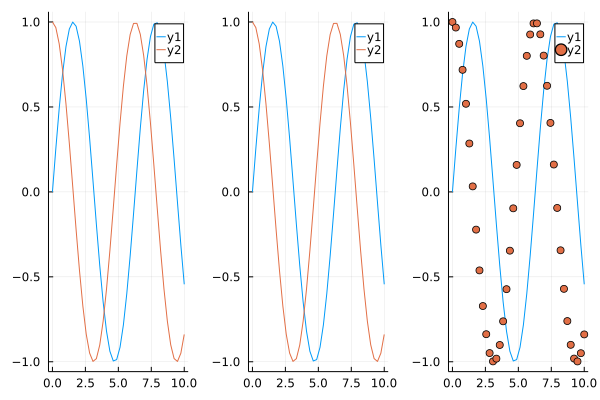

In [18]:
plot(pl1, pl2, pl3, layout = (1,3))

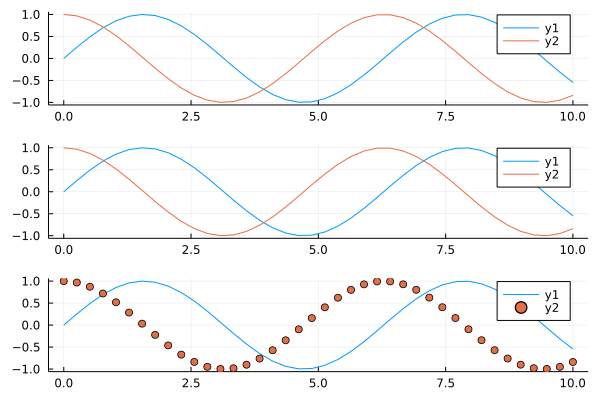

In [19]:
plot(pl1, pl2, pl3, layout = (3,1))

## Input-Daten 

- im einfachsten Fall ein Vektor von $m$ `x`-Werten und ein gleichlanger Vektor von $m$ `y`-Werten
- falls $y$ eine $m\times n$-Matrix ist, wird jeder Spaltenvektor als eine `Series` angesehen und es werden $n$ Kurven geplottet: 

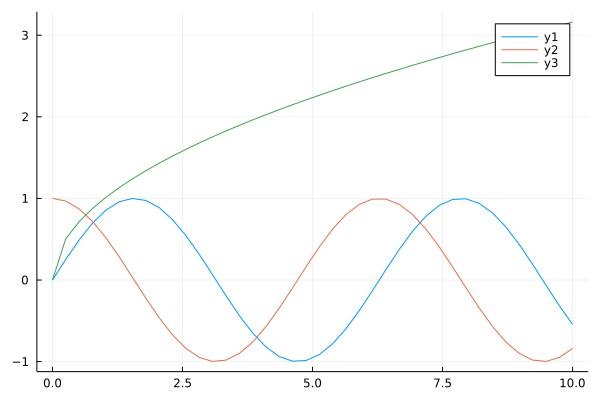

In [20]:

plot(x, [sin.(x) cos.(x) sqrt.(x)])


- Durch eine `layout`-Angabe kann man die einzelnen `series` auch in einzelnen Subplots 
unterbringen.
- Man kann `layouts` auch schachteln und explizite Breiten/Höhenangaben verwenden.

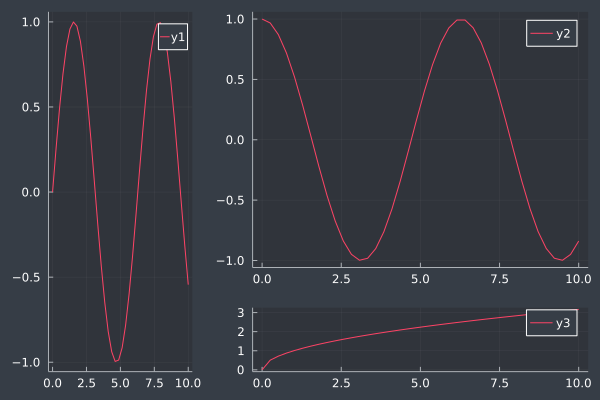

In [21]:
theme(:dark)

la1 = @layout [
        a{0.3w} [ b
                  c{0.2h}  ]
    ]

plot(x, [sin.(x) cos.(x) sqrt.(x)] , layout = la1)

## Plot-Attribute

`Plots.jl` teilt die Attribute in 4 Gruppen ein:

In [22]:
plotattr(:Plot)  # Attribute für den Gesamtplot

Defined Plot attributes are:
background_color, background_color_outside, display_type, dpi, extra_kwargs, extra_plot_kwargs, fontfamily, foreground_color, html_output_format, inset_subplots, layout, link, overwrite_figure, plot_title, plot_titlefontcolor, plot_titlefontfamily, plot_titlefonthalign, plot_titlefontrotation, plot_titlefontsize, plot_titlefontvalign, plot_titleindex, plot_titlelocation, plot_titlevspan, pos, show, size, tex_output_standalone, thickness_scaling, warn_on_unsupported, window_title


In [23]:
plotattr(:Subplot) # Attribute für einen Teilplot

Defined Subplot attributes are:
annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, aspect_ratio, background_color_inside, background_color_subplot, bottom_margin, camera, clims, color_palette, colorbar, colorbar_continuous_values, colorbar_discrete_values, colorbar_fontfamily, colorbar_formatter, colorbar_scale, colorbar_tickfontcolor, colorbar_tickfontfamily, colorbar_tickfonthalign, colorbar_tickfontrotation, colorbar_tickfontsize, colorbar_tickfontvalign, colorbar_ticks, colorbar_title, colorbar_title_location, colorbar_titlefontcolor, colorbar_titlefontfamily, colorbar_titlefonthalign, colorbar_titlefontrotation, colorbar_titlefontsize, colorbar_titlefontvalign, extra_kwargs, fontfamily_subplot, foreground_color_subplot, foreground_color_title, framestyle, left_margin, legend_background_color, legend_column, legend_font, legend_font_color, legend_font_family, legend_font_halign, legend_font_pointsize, lege

In [24]:
plotattr(:Axis)  # Attribute für eine Achse

Defined Axis attributes are:
discrete_values, draw_arrow, flip, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_guide, foreground_color_minor_grid, foreground_color_text, formatter, grid, gridalpha, gridlinewidth, gridstyle, guide, guide_position, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, lims, link, minorgrid, minorgridalpha, minorgridlinewidth, minorgridstyle, minorticks, mirror, rotation, scale, showaxis, tick_direction, tickfontcolor, tickfontfamily, tickfonthalign, tickfontrotation, tickfontsize, tickfontvalign, ticks, widen


In [25]:
plotattr(:Series) # Attribute für eine Serie, also zB ein Linienzug im Plot

Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, connections, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, fillstyle, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, normalize, orientation, permute, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, z_order, zerror


In [26]:
# Zur Erinnerung nochmal:

using Plots
using Plots.PlotMeasures   # für Angaben in mm, cm,...
using LaTeXStrings         # für LaTeX-Konstrukte in Plot-Beschriftungen
using PlotThemes           # vorgefertigte Themen

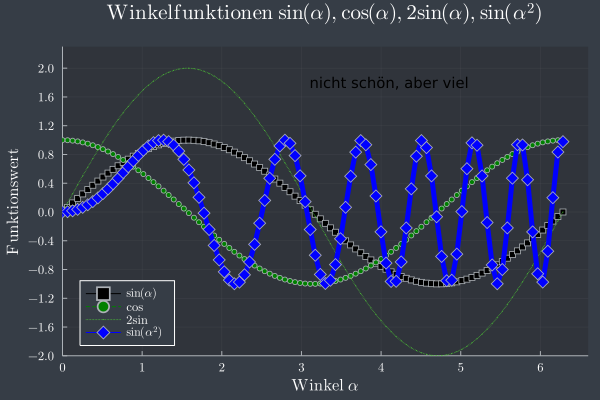

In [27]:
xs = range(0, 2π, length = 100)

data = [sin.(xs) cos.(xs) 2sin.(xs) (x->sin(x^2)).(xs)]

pl10 = plot(xs, data,
           fontfamily="Computer Modern",
    
           # LaTeX-String L""  ist im Math-mode  
           title = L"\textrm{Winkelfunktionen}\ \sin(\alpha), \cos(\alpha), 2\sin(\alpha), \sin(\alpha^2)",
           xlabel = L"\textrm{ Winkel\ } \alpha",
           ylabel = L"\textrm{Funktionswert}", 
    
           # 1x4-Matrizen mit Farben, Marker,...  für die 4 'Series' 
           color=[:black :green RGB(0.3, 0.8, 0.2) :blue ],
           markers = [:rect :circle :utriangle :diamond],
           markersize = [3 3 0 6],
           linewidth = [1 3 1 5],
           linestyle = [:solid :dash :dot :solid ],
           
           # Achsen
           xlim = (0, 6.6),
           ylim = (-2, 2.3),
           yticks = -2:.4:2.3,
           
           legend = :bottomleft,
           label = [ L"\sin(\alpha)" "cos" "2sin" L"\sin(\alpha^2)"],
    
           top_margin = 5mm,
)

# Zusatzelement

annotate!(pl10, 4.1, 1.8, text("nicht schön, aber viel",10))


### Säulendiagramm


In [28]:
using RDatasets

Inhalt:  über 700 freie (_"public domain"_) Datensätze, darunter z.B:

 - Passagierliste der _Titanic_ 
 - Verbrauchsdaten amerikanischer Autos aus den 70ern 
 - historische Währungskurse

 

In [29]:
RDatasets.datasets()

763×5 DataFrame
 Row │ Package   Dataset      Title        Rows   Columns 
     │ String15  String31     String       Int64  Int64   
─────┼────────────────────────────────────────────────────
   1 │ COUNT     affairs      affairs        601       18
   2 │ COUNT     azdrg112     azdrg112      1798        4
   3 │ COUNT     azpro        azpro         3589        6
   4 │ COUNT     badhealth    badhealth     1127        3
   5 │ COUNT     fasttrakg    fasttrakg       15        9
   6 │ COUNT     lbw          lbw            189       10
   7 │ COUNT     lbwgrp       lbwgrp           6        7
   8 │ COUNT     loomis       loomis         410       11
   9 │ COUNT     mdvis        mdvis         2227       13
  10 │ COUNT     medpar       medpar        1495       10
  11 │ COUNT     rwm          rwm          27326        4
  ⋮  │    ⋮           ⋮            ⋮         ⋮       ⋮
 754 │ gamair    mpg          mpg            205       27
 755 │ gamair    prostate     prostate       654      530
 756 │ gamair    sitka        sitka         1027        6
 757 │ gamair    sole         sole          1575        8
 758 │ gamair    sperm.comp1  sperm.comp1     15        5
 759 │ gamair    sperm.comp2  sperm.comp2     24       11
 760 │ gamair    stomata      stomata         24        4
 761 │ gamair    swer         swer          2196       10
 762 │ gamair    wesdr        wesdr          669        5
 763 │ gamair    wine         wine            47        8
                                          742 rows omitted

In [30]:
cars = dataset("datasets", "mtcars")

32×12 DataFrame
 Row │ Model              MPG      Cyl    Disp     HP     DRat     WT       QS ⋯
     │ String31           Float64  Int64  Float64  Int64  Float64  Float64  Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Mazda RX4             21.0      6    160.0    110     3.9     2.62      ⋯
   2 │ Mazda RX4 Wag         21.0      6    160.0    110     3.9     2.875
   3 │ Datsun 710            22.8      4    108.0     93     3.85    2.32
   4 │ Hornet 4 Drive        21.4      6    258.0    110     3.08    3.215
   5 │ Hornet Sportabout     18.7      8    360.0    175     3.15    3.44      ⋯
   6 │ Valiant               18.1      6    225.0    105     2.76    3.46
   7 │ Duster 360            14.3      8    360.0    245     3.21    3.57
   8 │ Merc 240D             24.4      4    146.7     62     3.69    3.19
   9 │ Merc 230              22.8      4    140.8     95     3.92    3.15      ⋯
  10 │ Merc 280              19.2      6    167.6    123     3.92    3.44
  11 │ Merc 280C             17.8      6    167.6    123     3.92    3.44
  ⋮  │         ⋮             ⋮       ⋮       ⋮       ⋮       ⋮        ⋮        ⋱
  23 │ AMC Javelin           15.2      8    304.0    150     3.15    3.435
  24 │ Camaro Z28            13.3      8    350.0    245     3.73    3.84      ⋯
  25 │ Pontiac Firebird      19.2      8    400.0    175     3.08    3.845
  26 │ Fiat X1-9             27.3      4     79.0     66     4.08    1.935
  27 │ Porsche 914-2         26.0      4    120.3     91     4.43    2.14
  28 │ Lotus Europa          30.4      4     95.1    113     3.77    1.513     ⋯
  29 │ Ford Pantera L        15.8      8    351.0    264     4.22    3.17
  30 │ Ferrari Dino          19.7      6    145.0    175     3.62    2.77
  31 │ Maserati Bora         15.0      8    301.0    335     3.54    3.57
  32 │ Volvo 142E            21.4      4    121.0    109     4.11    2.78      ⋯
                                                   5 columns and 11 rows omitted

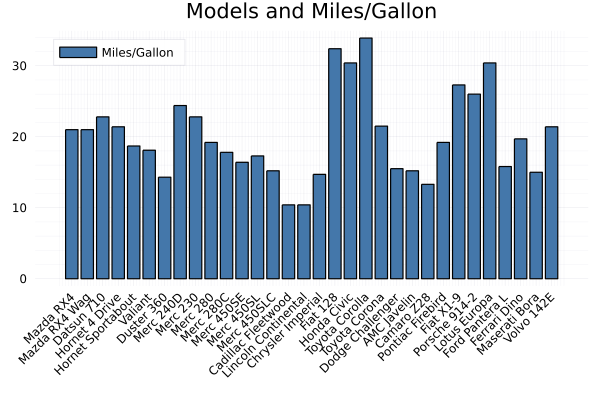

In [31]:
theme(:bright)

bar(cars.Model, cars.MPG,
           label = "Miles/Gallon",
           title = "Models and Miles/Gallon",
           xticks =:all,
           xrotation = 45,
           size = [600, 400],
           legend =:topleft,
           bottom_margin = 10mm
   )
